In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import glob

In [3]:
path_lr_files = "/u/lukas.rilling/experiments/glow_tts_asr_v2/alias/experiments/librispeech/librispeech_glow_asr/pytorch/blstm_2x512_d0.2_b300_fs4_glow*/training/work/learning_rates"

lrs = glob.glob(path_lr_files)
lrs

['/u/lukas.rilling/experiments/glow_tts_asr_v2/alias/experiments/librispeech/librispeech_glow_asr/pytorch/blstm_2x512_d0.2_b300_fs4_glow_enc192_200epsTTS_no_silence_preprocessing/training/work/learning_rates',
 '/u/lukas.rilling/experiments/glow_tts_asr_v2/alias/experiments/librispeech/librispeech_glow_asr/pytorch/blstm_2x512_d0.2_b300_fs4_glow_with_small_enc/training/work/learning_rates',
 '/u/lukas.rilling/experiments/glow_tts_asr_v2/alias/experiments/librispeech/librispeech_glow_asr/pytorch/blstm_2x512_d0.2_b300_fs4_glow_enc192_100epsTTS/training/work/learning_rates',
 '/u/lukas.rilling/experiments/glow_tts_asr_v2/alias/experiments/librispeech/librispeech_glow_asr/pytorch/blstm_2x512_d0.2_b300_fs4_glow_nar_taco_encoder_no_silence_preprocessing/training/work/learning_rates',
 '/u/lukas.rilling/experiments/glow_tts_asr_v2/alias/experiments/librispeech/librispeech_glow_asr/pytorch/blstm_2x512_d0.2_b300_fs4_glow_nar_taco_encoder/training/work/learning_rates',
 '/u/lukas.rilling/experime

In [4]:
path_tts_lr_files = ["/u/lukas.rilling/experiments/glow_tts_asr_v2/alias/experiments/librispeech/tts_architecture/glow_tts/raw_audio/glowTTS_enc192*/training/work/learning_rates", "/u/lukas.rilling/experiments/glow_tts_asr_v2/alias/experiments/librispeech/tts_architecture/glow_tts/raw_audio/glowTTS_nar_taco_encoder*/training/work/learning_rates"]

tts_lrs = []

for f in path_tts_lr_files:
    tts_lrs.extend(glob.glob(f))

tts_lrs

['/u/lukas.rilling/experiments/glow_tts_asr_v2/alias/experiments/librispeech/tts_architecture/glow_tts/raw_audio/glowTTS_enc192_lr1e-6_5e-4_1e-6/training/work/learning_rates',
 '/u/lukas.rilling/experiments/glow_tts_asr_v2/alias/experiments/librispeech/tts_architecture/glow_tts/raw_audio/glowTTS_enc192_100ep/training/work/learning_rates',
 '/u/lukas.rilling/experiments/glow_tts_asr_v2/alias/experiments/librispeech/tts_architecture/glow_tts/raw_audio/glowTTS_enc192_200ep_long_cooldown_silence_preprocessed/training/work/learning_rates',
 '/u/lukas.rilling/experiments/glow_tts_asr_v2/alias/experiments/librispeech/tts_architecture/glow_tts/raw_audio/glowTTS_enc192_200ep_long_cooldown/training/work/learning_rates',
 '/u/lukas.rilling/experiments/glow_tts_asr_v2/alias/experiments/librispeech/tts_architecture/glow_tts/raw_audio/glowTTS_enc192_200ep_long_cooldown_fs4_silence_preprocessed/training/work/learning_rates',
 '/u/lukas.rilling/experiments/glow_tts_asr_v2/alias/experiments/librispeech

In [5]:
asr_tts_dict = {
    "blstm_2x512_d0.2_b300_fs4_glow_nar_taco_encoder": "glowTTS_nar_taco_encoder_silence_preprocessed",
    "blstm_2x512_d0.2_b300_fs4_glow_enc192_200epsTTS_no_silence_preprocessing": "glowTTS_enc192_200ep_long_cooldown",
    "blstm_2x512_d0.2_b300_fs4_glow_enc192_100epsTTS": "glowTTS_enc192_100ep_silence_preprocessed",
    "blstm_2x512_d0.2_b300_fs4_glow_nar_taco_encoder_no_silence_preprocessing": "glowTTS_nar_taco_encoder",
    "blstm_2x512_d0.2_b300_fs4_glow_enc192_200epsTTS": "glowTTS_enc192_200ep_long_cooldown_silence_preprocessed",
    "blstm_2x512_d0.2_b300_fs4_glow_enc192_100epsTTS_no_silence_preprocessing": "glowTTS_enc192_100ep",
    "blstm_2x512_d0.2_b300_fs4_glow_nar_taco_encoder_no_blstm": "glowTTS_nar_taco_encoder_no_blstm_silence_preprocessed",
    "blstm_2x512_d0.2_b300_fs4_glow_nar_taco_encoder_no_blstm_16blocks": "glowTTS_nar_taco_encoder_no_blstm_16blocks_silence_preprocessed"
}

asr_tts_dict = {v: k for k, v in asr_tts_dict.items()}

In [6]:
path_wer_files = "/u/lukas.rilling/experiments/glow_tts_asr_v2/output/experiments/librispeech/librispeech_glow_asr/pytorch/blstm_2x512_d0.2_b300_fs4*/default_250/dev-other/sclite/wer"

wers = glob.glob(path_wer_files)

In [7]:
def EpochData(learningRate, error):
  return {'learning_rate': learningRate, 'error': error}

def get_epoch_data(filename, epoch):
  def _get_last_epoch(epoch_data):
    return max([ep for ep in epoch_data.keys() if epoch_data[ep]['error']])

  if not os.path.exists(filename):
    return None
  if os.path.isdir(filename):
    if os.path.exists(os.path.join(filename, 'work/learning_rates')):
      filename = os.path.join(filename, 'work/learning_rates')
    else: 
      return None
  with open(filename, 'r') as f:
    data = eval(f.read())
  if epoch is None:
    return data
  last_epoch = _get_last_epoch(data)  #sorted(list(data.keys()))[-1]
  if epoch == 'last':
    epoch = last_epoch
  else:
    try:
      epoch = int(epoch)
    except ValueError:
      raise ValueError('epoch must be "last" or int')
    epoch = min(epoch, last_epoch)
  progr = data[epoch]
  progr['epoch'] = epoch
  return progr

In [8]:
import os.path
import re
lr_prefix = os.path.commonpath(lrs) + "/"
lr_suffix = "/" + os.path.commonpath([l[::-1] for l in lrs])[::-1]

error_data = {}
for l in lrs:
    key = l.replace(lr_prefix, "").replace(lr_suffix, "")
    # print(key)
    if re.search("_lm|beam|drop_around", key):
        continue
    with open(l, "r") as f:
        error_data[key] = get_epoch_data(l, epoch="last")["error"]

lr_prefix = os.path.commonpath(tts_lrs) + "/"
lr_suffix = "/" + os.path.commonpath([l[::-1] for l in tts_lrs])[::-1]
tts_error_data = {}
for l in tts_lrs:
    key = l.replace(lr_prefix, "").replace(lr_suffix, "")
    if key in asr_tts_dict.keys():
        with open(l, "r") as f:
            tts_error_data[asr_tts_dict[key]] = get_epoch_data(l, epoch="last")["error"]

lr_df = pd.DataFrame(error_data).transpose()
tts_lr_df = pd.DataFrame(tts_error_data).transpose()
lrs_df = lr_df.join(tts_lr_df).dropna()
lrs_df

,ctc,dev_loss_ctc,dev_loss_dp,dev_loss_mle,dp,mle
blstm_2x512_d0.2_b300_fs4_glow_enc192_200epsTTS_no_silence_preprocessing,0.449083,1.041730,0.432932,-0.694879,0.411271,-0.839926
blstm_2x512_d0.2_b300_fs4_glow_enc192_100epsTTS,0.350058,1.065886,0.385518,-0.805740,0.373986,-0.819508
blstm_2x512_d0.2_b300_fs4_glow_nar_taco_encoder_no_silence_preprocessing,0.668469,1.025836,0.455673,-0.707680,0.411171,-0.844504
blstm_2x512_d0.2_b300_fs4_glow_nar_taco_encoder,0.621997,1.080998,0.423963,-0.813688,0.386848,-0.829622
blstm_2x512_d0.2_b300_fs4_glow_enc192_200epsTTS,0.407532,1.039962,0.390598,-0.807288,0.377117,-0.822150
blstm_2x512_d0.2_b300_fs4_glow_enc192_100epsTTS_no_silence_preprocessing,0.384983,1.046416,0.423657,-0.770533,0.406652,-0.836500
blstm_2x512_d0.2_b300_fs4_glow_nar_taco_encoder_no_blstm,0.248099,1.134706,0.496480,-0.754337,0.515711,-0.763240
blstm_2x512_d0.2_b300_fs4_glow_nar_taco_encoder_no_blstm_16blocks,0.105269,1.319597,0.390617,-0.805962,0.380009,-0.820648


In [9]:
wer_prefix = os.path.commonpath(wers) + "/"
wer_suffix = "/" + os.path.commonpath([w[::-1] for w in wers])[::-1]

wer_data = {}
for w in wers:
    key = w.removeprefix(wer_prefix).removesuffix(wer_suffix)
    with open(w, "r") as f:
        wer_data[key] = {"wer": float(f.read().removesuffix("\n"))}

wer_df = pd.DataFrame(wer_data).transpose()


In [10]:
df = lrs_df.join(wer_df).dropna()
df["overfitting"] = df["dev_loss_ctc"] - df["ctc"]
df.sort_values("wer")

,ctc,dev_loss_ctc,dev_loss_dp,dev_loss_mle,dp,mle,wer,overfitting
blstm_2x512_d0.2_b300_fs4_glow_nar_taco_encoder_no_blstm_16blocks,0.105269,1.319597,0.390617,-0.805962,0.380009,-0.820648,55.1,1.214328
blstm_2x512_d0.2_b300_fs4_glow_nar_taco_encoder_no_blstm,0.248099,1.134706,0.496480,-0.754337,0.515711,-0.763240,56.3,0.886607
blstm_2x512_d0.2_b300_fs4_glow_enc192_100epsTTS_no_silence_preprocessing,0.384983,1.046416,0.423657,-0.770533,0.406652,-0.836500,60.6,0.661433
blstm_2x512_d0.2_b300_fs4_glow_enc192_100epsTTS,0.350058,1.065886,0.385518,-0.805740,0.373986,-0.819508,60.8,0.715827
blstm_2x512_d0.2_b300_fs4_glow_enc192_200epsTTS_no_silence_preprocessing,0.449083,1.041730,0.432932,-0.694879,0.411271,-0.839926,61.8,0.592648
blstm_2x512_d0.2_b300_fs4_glow_enc192_200epsTTS,0.407532,1.039962,0.390598,-0.807288,0.377117,-0.822150,61.8,0.632430
blstm_2x512_d0.2_b300_fs4_glow_nar_taco_encoder_no_silence_preprocessing,0.668469,1.025836,0.455673,-0.707680,0.411171,-0.844504,66.2,0.357367
blstm_2x512_d0.2_b300_fs4_glow_nar_taco_encoder,0.621997,1.080998,0.423963,-0.813688,0.386848,-0.829622,67.7,0.459001


In [11]:
df.corr()

,ctc,dev_loss_ctc,dev_loss_dp,dev_loss_mle,dp,mle,wer,overfitting
ctc,1.000000,-0.758076,0.193071,0.336384,-0.173255,-0.543784,0.973273,-0.971013
dev_loss_ctc,-0.758076,1.000000,-0.167171,-0.374412,0.020587,0.339732,-0.691950,0.891988
dev_loss_dp,0.193071,-0.167171,1.000000,0.606708,0.914806,0.481271,0.006021,-0.195101
dev_loss_mle,0.336384,-0.374412,0.606708,1.000000,0.420190,-0.191892,0.145764,-0.370398
dp,-0.173255,0.020587,0.914806,0.420190,1.000000,0.758268,-0.345110,0.127641
mle,-0.543784,0.339732,0.481271,-0.191892,0.758268,1.000000,-0.600242,0.501449
wer,0.973273,-0.691950,0.006021,0.145764,-0.345110,-0.600242,1.000000,-0.928250
overfitting,-0.971013,0.891988,-0.195101,-0.370398,0.127641,0.501449,-0.928250,1.000000


<Axes: xlabel='ctc', ylabel='wer'>

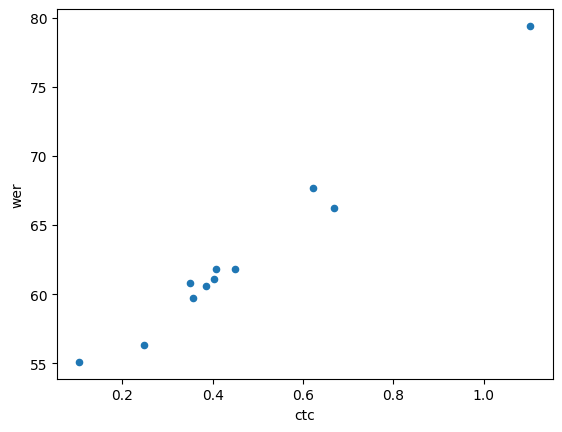

In [43]:
df.plot.scatter("ctc", "wer")

<Axes: xlabel='dev_loss_ctc', ylabel='wer'>

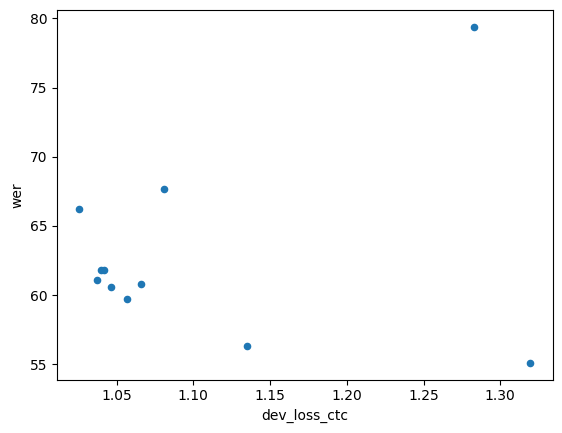

In [44]:
df.plot.scatter("dev_loss_ctc", "wer")


<Axes: xlabel='overfitting', ylabel='wer'>

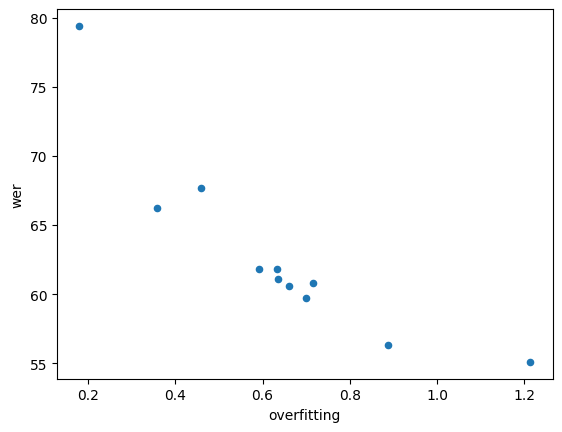

In [45]:
df.plot.scatter("overfitting", "wer")


<Axes: xlabel='dev_loss_mle', ylabel='wer'>

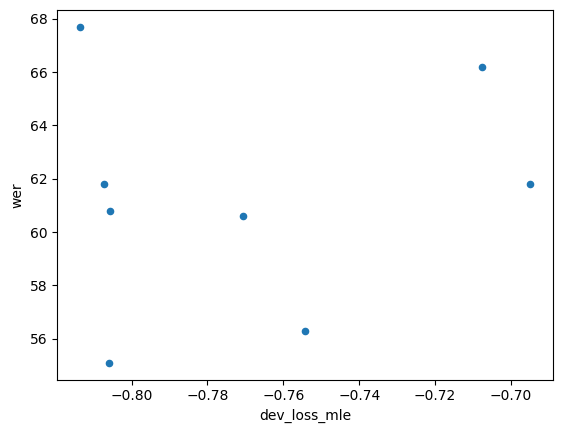

In [47]:
df.plot.scatter("dev_loss_mle", "wer")

<Axes: xlabel='dev_loss_dp', ylabel='wer'>

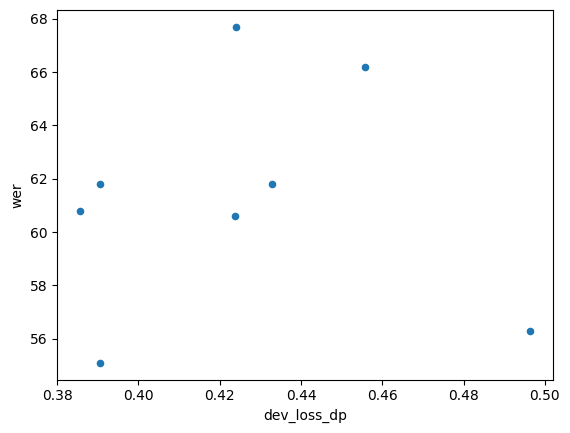

In [49]:
df.plot.scatter("dev_loss_dp", "wer")
